In [1]:
!pip install indic-nlp-library
!pip install inltk

     |████████████████████████████████| 1.2MB 5.3MB/s 
     |████████████████████████████████| 235kB 13.5MB/s 
     |████████████████████████████████| 1.3MB 9.7MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 296kB 24.1MB/s 
     |████████████████████████████████| 143kB 25.0MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26310 sha256=5d7acd79fa14bf1d358333f7232f7e051ad85a115066362f270ac512cde85c5b
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=28db3db0442b56d1aaf124474205e7d45a78044656214dd478ac246fe1270cb5
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built typing idna-ssl
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fast

In [2]:
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from sklearn.metrics import silhouette_score
 from sklearn.preprocessing import StandardScaler
 from sklearn.utils import shuffle


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
!wget 'https://raw.githubusercontent.com/gadepall/dharma/main/mantra/aigiri.txt'#21 items 
!wget 'https://raw.githubusercontent.com/xangelina007/Datasets/main/hanuman_chalisa_hindi.txt'#40 items 
stothram_file = open('aigiri.txt','r')
stothram_txt = stothram_file.read()
stothram_file.close()

chalisa_file = open('hanuman_chalisa_hindi.txt', 'r')
chalisa_txt = chalisa_file.read()
chalisa_file.close()


--2021-01-31 03:45:30--  https://raw.githubusercontent.com/gadepall/dharma/main/mantra/aigiri.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11269 (11K) [text/plain]
Saving to: ‘aigiri.txt’

aigiri.txt          100%[===================>]  11.00K  --.-KB/s    in 0s      

2021-01-31 03:45:30 (63.6 MB/s) - ‘aigiri.txt’ saved [11269/11269]

--2021-01-31 03:45:30--  http://items/
Resolving items (items)... failed: Name or service not known.
wget: unable to resolve host address ‘items’
FINISHED --2021-01-31 03:45:30--
Total wall clock time: 0.2s
Downloaded: 1 files, 11K in 0s (63.6 MB/s)
--2021-01-31 03:45:30--  https://raw.githubusercontent.com/xangelina007/Datasets/main/hanuman_chalisa_hindi.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...

In [4]:
pattern_list = []

def get_sloka_from_stothram(stothram_txt):
  slokams = []
  for sloka in stothram_txt.split('॥'):
    if not sloka.replace(' ', '').isnumeric() and not sloka == '\n' and not sloka == '':
      slokams.append( sloka.replace('|', '').replace('\n', '') )
  return slokams

def gen_patterns(slokams):
  global pattern_list
  for sloka in slokams:
    temp = {}
    for words in sloka.split():
      for char in words:
        if char in temp.keys():
          temp[char] = temp[char] + 1
        else:
          temp[char] = 1 
    pattern_list.append(temp)

def to_find_accuracy(predicted, actual):
  if len(predicted) == len(actual):
    right = 0
    for i in range(len(actual)):
      if predicted[i] == actual[i]:
        right = right + 1
    print('accuracy: ', right/len(actual))

In [5]:
aigiri = get_sloka_from_stothram(stothram_txt)
chalisa = get_sloka_from_stothram(chalisa_txt)
#print(aigiri)

In [6]:
gen_patterns(aigiri)
gen_patterns(chalisa)

In [7]:
df = pd.DataFrame(pattern_list).fillna(0)
df

,अ,य,ि,ग,र,न,्,द,त,म,े,व,श,ो,ु,ध,ऽ,ा,स,ष,ण,ल,ज,।,भ,ह,क,ठ,ट,ब,ू,ृ,प,ै,ख,ङ,घ,ञ,ड,च,ी,थ,फ,ः,ं,झ,ौ,ॊ,उ,ॆ,औ,ऊ,आ,ई,(,),ऎ,छ,इ
0,1.0,5.0,40.0,3.0,10.0,20.0,14.0,7.0,7.0,6.0,7.0,9.0,4.0,2.0,10.0,2.0,1.0,3.0,4.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,30.0,0.0,20.0,6.0,14.0,8.0,8.0,7.0,5.0,3.0,3.0,7.0,12.0,3.0,0.0,1.0,6.0,13.0,9.0,2.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.0,19.0,5.0,11.0,7.0,12.0,5.0,5.0,13.0,6.0,2.0,4.0,1.0,6.0,4.0,0.0,5.0,5.0,1.0,1.0,3.0,6.0,1.0,3.0,4.0,4.0,0.0,2.0,3.0,0.0,1.0,2.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,20.0,4.0,9.0,4.0,15.0,5.0,12.0,6.0,5.0,4.0,4.0,0.0,9.0,3.0,0.0,8.0,2.0,1.0,12.0,1.0,6.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,8.0,1.0,3.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,5.0,14.0,0.0,19.0,5.0,11.0,13.0,15.0,8.0,5.0,4.0,5.0,1.0,12.0,4.0,0.0,7.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,2.0,0.0,3.0,1.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,3.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
60,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x = df.values
y = np.concatenate((np.ones(22), np.zeros(40)))

In [9]:
x.shape

(62, 59)

In [10]:
y.shape

(62,)

In [11]:
x, y = shuffle(x, y)

In [12]:

preprocessor = Pipeline(
    [
      ("scaler", MinMaxScaler()),
      ("pca", PCA(n_components=2, random_state=42)),
    ]
   )

In [13]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters = 2,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [14]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [15]:
pipe.fit(x)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=2, n_init=50, n_jobs=None,
                                         precomp

In [16]:
to_find_accuracy(pipe["clusterer"]["kmeans"].labels_, y)

accuracy:  0.016129032258064516


In [17]:
preprocessed_data = pipe["preprocessor"].transform(x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.7506813116642159

In [18]:
adjusted_rand_score(y, predicted_labels)

0.9350819502372429

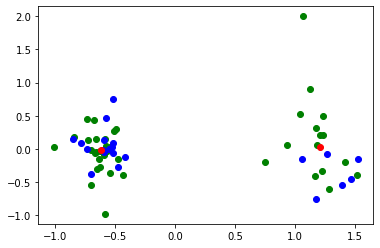

In [19]:
plt.plot( preprocessed_data[21:, 0], preprocessed_data[21:, 1], 'og', preprocessed_data[:21, 0] , preprocessed_data[:21, 1], "ob", pipe["clusterer"]["kmeans"].cluster_centers_[:, 0], pipe["clusterer"]["kmeans"].cluster_centers_[:, 1], 'or' )
plt.show() 

In [20]:
pipe["clusterer"]["kmeans"].cluster_centers_

array([[ 1.21164359,  0.02407183],
       [-0.62059794, -0.01232947]])